# Import necessary libraries for data analysis and visualization

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the dataset and store it in a variable named 'data'


In [94]:
data_path = "ncr_ride_bookings.csv"
data_main= pd.read_csv(data_path)
data = data_main.copy()
data.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [95]:
cols = ["Booking Value", "Ride Distance", "Payment Method", "Avg CTAT"]

mask_missing = data[cols].isna().all(axis=1)

data.loc[mask_missing, "Booking Status"].value_counts()


Booking Status
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Name: count, dtype: int64

# Inspect data types of all columns and fix any incorrect types


In [96]:
data.dtypes

Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object

In [97]:
type(data["Date"][1])

str

# Convert the 'Date' column from object/string to datetime format


In [98]:
data.loc[:,"Date"] = pd.to_datetime(data["Date"] , errors='coerce').dt.date
type(data["Date"][1])

datetime.date

In [99]:
data

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,NaN,NaN,NaN,NaN,NaN,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,NaN,NaN,NaN,NaN,NaN,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,NaN,NaN,NaN,NaN,NaN,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,NaN,NaN,NaN,NaN,NaN,333.0,45.54,4.1,3.7,UPI


# Display customer-related statistics (e.g., count, unique values, etc.)


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

# Replace missing values (NaN) in 'Avg VTAT' and 'Avg CTAT' columns


In [101]:
data["Avg VTAT"]

0          NaN
1          4.9
2         13.4
3         13.1
4          5.3
          ... 
149995    10.2
149996     5.1
149997     2.7
149998     6.9
149999     3.5
Name: Avg VTAT, Length: 150000, dtype: float64

In [102]:
data["Avg VTAT"].isna().sum()

np.int64(10500)

In [103]:
data["Avg CTAT"].unique()

array([ nan, 14. , 25.8, 28.5, 19.6, 18.1, 20.4, 16.5, 26. , 18.9, 28.2,
       30.9, 36.9, 27.5, 33.7, 21.3, 25.1, 41.1, 25.2, 20.7, 31.1, 41. ,
       20.5, 19.4, 25.4, 30. , 35.8, 18.7, 10.5, 42.3, 29.7, 42.2, 21.6,
       40.7, 35.4, 23.2, 42.1, 21.5, 33. , 10.1, 24.3, 44.5, 27.1, 38.5,
       17.2, 37.3, 26.7, 34.7, 39.1, 23. , 31.3, 43.7, 35. , 15.6, 43.6,
       18. , 32.7, 24.6, 38.9, 16.4, 36.2, 35.5, 41.7, 38. , 40. , 37. ,
       40.4, 28.7, 30.6, 21.1, 18.8, 30.4, 15.9, 21.9, 25. , 44.4, 16.7,
       26.3, 15.8, 31.5, 30.7, 23.6, 24.2, 17.9, 15.5, 25.3, 37.4, 22.8,
       28.9, 44.7, 24.8, 26.6, 32.6, 24.4, 39.3, 32.5, 43.1, 26.5, 17. ,
       20.6, 37.7, 40.2, 31.6, 33.5, 32.9, 17.7, 39. , 18.4, 41.8, 22. ,
       10.3, 15.7, 16.8, 22.2, 33.1, 27.9, 34.1, 33.9, 22.4, 34.6, 20.2,
       30.8, 20. , 43.4, 27.2, 30.5, 27.4, 28.1, 31.4, 15.3, 39.9, 37.9,
       37.8, 40.6, 23.7, 31.9, 19.7, 23.1, 20.9, 25.5, 42.5, 29.8, 42.6,
       41.6, 34.9, 23.4, 17.3, 41.2, 27.3, 20.1, 18

In [104]:
data["Avg CTAT"].isna().sum()

np.int64(48000)

In [105]:
mean_vtat = data["Avg VTAT"].mean()
mean_ctat = data["Avg CTAT"].mean()

data.loc[
    (data["Booking Status"] == "Completed") & (data["Avg VTAT"].isna()),
    "Avg VTAT"
] = mean_vtat

data.loc[
    (data["Booking Status"] == "Completed") & (data["Avg CTAT"].isna()),
    "Avg CTAT"
] = mean_ctat


In [106]:
data["Avg CTAT"].isna().sum()

np.int64(48000)

In [107]:
data["Avg VTAT"].isna().sum()

np.int64(10500)

In [108]:
check = (data["Cancelled Rides by Customer"].isna() == 
         data["Reason for cancelling by Customer"].isna())

print(check.all())


True


# For 'Cancelled Rides by Customer': Replace NaN with 0 (not cancelled) and keep 1 as cancelled, then convert the column to numeric
## Note: This step is based on the observation that NaN values in 'Reason for Cancelling by Customer' align with the 0 values in 'Cancelled Rides by Customer'


In [109]:
check = (data["Cancelled Rides by Customer"].isna() == 
         data["Reason for cancelling by Customer"].isna())

print(check.all())


True


In [110]:
data['Cancelled Rides by Customer'].unique()

array([nan,  1.])

In [111]:
data.loc[:,"Cancelled Rides by Customer"]= data["Cancelled Rides by Customer"].fillna(0)

data.loc[:,"Cancelled Rides by Customer"]= data["Cancelled Rides by Customer"].replace(1. , 1)

data["Cancelled Rides by Customer"] = data["Cancelled Rides by Customer"].astype(int)

data["Cancelled Rides by Customer"].dtypes


dtype('int64')

In [112]:
data['Cancelled Rides by Customer'].isna().sum()

np.int64(0)

## Update values in 'Reason for Cancelling by Customer' column:


In [113]:
data["Reason for cancelling by Customer"].unique()

array([nan, 'Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is not working', 'Change of plans',
       'Wrong Address'], dtype=object)

In [114]:
data.loc[:,"Reason for cancelling by Customer"]= data["Reason for cancelling by Customer"].fillna("Not Cancelled")
data["Reason for cancelling by Customer"] = data["Reason for cancelling by Customer"].astype(str)


In [115]:
data["Reason for cancelling by Customer"].unique()

array(['Not Cancelled', 'Driver is not moving towards pickup location',
       'Driver asked to cancel', 'AC is not working', 'Change of plans',
       'Wrong Address'], dtype=object)

# Explore information about driver-initiated cancellations


In [116]:
data['Cancelled Rides by Driver'].isnull().sum()

np.int64(123000)

In [117]:
data['Driver Cancellation Reason'].isnull().sum()

np.int64(123000)

In [118]:
check = (data["Cancelled Rides by Driver"].isna() == 
         data["Driver Cancellation Reason"].isna())

print(check.all())


True


# We observed that the values in the 'Cancelled Rides by Driver' column match the entries in the 'Driver Cancellation Reason' column for the same rows. Therefore, we will clean and adjust them in the same way we handled 'Reason for Cancelling by Customer' and 'Cancelled Rides by Customer'.

In [119]:
data.loc[:,"Cancelled Rides by Driver"]= data["Cancelled Rides by Driver"].fillna(0)

data.loc[:,"Cancelled Rides by Driver"]= data["Cancelled Rides by Driver"].replace(1. , 1)

data["Cancelled Rides by Driver"] = data["Cancelled Rides by Driver"].astype(int)

data["Cancelled Rides by Driver"].dtypes

dtype('int64')

In [120]:
data.loc[:,"Driver Cancellation Reason"]= data["Driver Cancellation Reason"].fillna("Not Cancelled")
data["Driver Cancellation Reason"] = data["Driver Cancellation Reason"].astype(str)

In [121]:
data['Driver Cancellation Reason'].isnull().sum()

np.int64(0)

In [122]:
data["Cancelled Rides by Driver"].isnull().sum()

np.int64(0)

# Verify that the 'Incomplete Rides' and 'Incomplete Rides Reason' columns are aligned and contain the same number of entries.

In [123]:
data['Incomplete Rides'].unique()

array([nan,  1.])

In [124]:
data['Incomplete Rides'].isnull().sum()

np.int64(141000)

In [125]:
data['Incomplete Rides Reason'].unique()

array([nan, 'Vehicle Breakdown', 'Other Issue', 'Customer Demand'],
      dtype=object)

In [126]:
data['Incomplete Rides Reason'].isnull().sum()

np.int64(141000)

# We will replace the missing values in the same way as before in both columns.

In [127]:
data.loc[:,"Incomplete Rides"]= data["Incomplete Rides"].fillna(0)

data.loc[:,"Incomplete Rides"]= data["Incomplete Rides"].replace(1. , 1)

data["Incomplete Rides"] = data["Incomplete Rides"].astype(int)

data["Incomplete Rides"].dtypes

dtype('int64')

In [128]:
data.loc[:,"Incomplete Rides Reason"]= data["Incomplete Rides Reason"].fillna("Completed")
data["Incomplete Rides Reason"] = data["Incomplete Rides Reason"].astype(str)

In [129]:
data['Incomplete Rides'].isnull().sum()

np.int64(0)

In [130]:
data['Incomplete Rides Reason'].isnull().sum()

np.int64(0)

# Explore the 'Booking Value' and 'Ride Distance' columns and check for potential correlations.


In [131]:
data['Booking Value']

0            NaN
1          237.0
2          627.0
3          416.0
4          737.0
           ...  
149995     475.0
149996    1093.0
149997     852.0
149998     333.0
149999     806.0
Name: Booking Value, Length: 150000, dtype: float64

In [132]:
data['Booking Value'].isnull().sum()

np.int64(48000)

In [133]:
data['Ride Distance'].unique()

array([  nan,  5.73, 13.58, ...,  1.93,  1.19,  1.2 ], shape=(4902,))

In [134]:
data['Ride Distance'].isnull().sum()

np.int64(48000)

In [135]:
check = (data["Ride Distance"].isna() == 
         data["Booking Value"].isna())

print(check.all())


True


# Replace missing values in both 'Booking Value' and 'Ride Distance' columns with 0.


In [136]:
data.loc[:,"Ride Distance"]= data["Ride Distance"].fillna(0)
data.loc[:,"Booking Value"]= data["Booking Value"].fillna(0)


In [137]:
data['Booking Value'].isnull().sum()

np.int64(0)

In [138]:
data['Ride Distance'].isnull().sum()

np.int64(0)

# Analyze the 'Driver Ratings' and 'Customer Rating' columns to understand rating patterns.


In [139]:
data['Driver Ratings'].isnull().sum()

np.int64(57000)

In [140]:
data['Customer Rating'].isnull().sum()

np.int64(57000)

In [141]:
check = (data["Driver Ratings"].isna() == 
         data["Customer Rating"].isna())

print(check.all())


True


# Replace missing values in both rating columns with 0.


In [142]:
data.loc[:,"Customer Rating"]= data["Customer Rating"].fillna(0)
data.loc[:,"Driver Ratings"]= data["Driver Ratings"].fillna(0)


In [143]:
data['Customer Rating'].isnull().sum()

np.int64(0)

In [144]:
data['Driver Ratings'].isnull().sum()

np.int64(0)

# Inspect the 'Payment Method' column to review available payment options.


In [145]:
data["Payment Method"]

0                 NaN
1                 UPI
2          Debit Card
3                 UPI
4                 UPI
             ...     
149995    Uber Wallet
149996            UPI
149997           Cash
149998            UPI
149999    Credit Card
Name: Payment Method, Length: 150000, dtype: object

In [146]:
data["Payment Method"].unique()

array([nan, 'UPI', 'Debit Card', 'Cash', 'Uber Wallet', 'Credit Card'],
      dtype=object)

In [147]:
data["Payment Method"].isna().sum()

np.int64(48000)

In [148]:
data[data["Payment Method"].isna()]


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,Not Cancelled,0,Not Cancelled,0,Completed,0.0,0.0,0.0,0.0,NaN
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,Not Cancelled,0,Not Cancelled,0,Completed,0.0,0.0,0.0,0.0,NaN
11,2024-09-18,08:09:38,"""CNR9551927""",No Driver Found,"""CID7568143""",Auto,Vidhan Sabha,AIIMS,NaN,NaN,...,Not Cancelled,0,Not Cancelled,0,Completed,0.0,0.0,0.0,0.0,NaN
12,2024-06-25,22:44:15,"""CNR4386945""",Cancelled by Driver,"""CID5543520""",eBike,Patel Chowk,Kherki Daula Toll,4.6,NaN,...,Not Cancelled,1,Personal & Car related issues,0,Completed,0.0,0.0,0.0,0.0,NaN
17,2024-12-15,15:08:25,"""CNR6739317""",Cancelled by Driver,"""CID8682675""",Go Sedan,Vinobapuri,GTB Nagar,6.0,NaN,...,Not Cancelled,1,Customer related issue,0,Completed,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149979,2024-10-05,17:30:25,"""CNR8459494""",Cancelled by Driver,"""CID9568404""",Auto,Chirag Delhi,Palam Vihar,5.9,NaN,...,Not Cancelled,1,The customer was coughing/sick,0,Completed,0.0,0.0,0.0,0.0,NaN
149980,2024-12-10,15:31:45,"""CNR6231822""",No Driver Found,"""CID6232718""",Premier Sedan,Kirti Nagar,Sarojini Nagar,NaN,NaN,...,Not Cancelled,0,Not Cancelled,0,Completed,0.0,0.0,0.0,0.0,NaN
149982,2024-11-13,06:51:19,"""CNR4448255""",No Driver Found,"""CID9138957""",Auto,Sikanderpur,Old Gurgaon,NaN,NaN,...,Not Cancelled,0,Not Cancelled,0,Completed,0.0,0.0,0.0,0.0,NaN
149990,2024-09-26,12:31:22,"""CNR3212810""",Cancelled by Driver,"""CID6199171""",Auto,Kashmere Gate ISBT,GTB Nagar,10.7,NaN,...,Not Cancelled,1,Personal & Car related issues,0,Completed,0.0,0.0,0.0,0.0,NaN


# Verify that no other missing data exists across the dataset.


In [149]:
missing_counts = []

for i in range(len(data.columns)):
    col_missing = data.iloc[:, i].isnull().sum()
    missing_counts.append(col_missing)

print(missing_counts)


[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(10500), np.int64(48000), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(48000)]


# Extract additional features from the 'Date' and 'Time' columns, 
## such as day of the week, month names, and time-related insights.

In [150]:
data

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,Not Cancelled,0,Not Cancelled,0,Completed,0.0,0.00,0.0,0.0,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Not Cancelled,0,Not Cancelled,1,Vehicle Breakdown,237.0,5.73,0.0,0.0,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,Not Cancelled,0,Not Cancelled,0,Completed,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,Not Cancelled,0,Not Cancelled,0,Completed,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,Not Cancelled,0,Not Cancelled,0,Completed,737.0,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,Not Cancelled,0,Not Cancelled,0,Completed,475.0,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,Not Cancelled,0,Not Cancelled,0,Completed,1093.0,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,Not Cancelled,0,Not Cancelled,0,Completed,852.0,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,Not Cancelled,0,Not Cancelled,0,Completed,333.0,45.54,4.1,3.7,UPI


In [151]:
print(data["Date"].dtype)
print(data["Date"].head())


object
0    2024-03-23
1    2024-11-29
2    2024-08-23
3    2024-10-21
4    2024-09-16
Name: Date, dtype: object


In [152]:
print(data["Date"].dtype)

object


In [153]:
print(data["Date"].dtype)
print(data["Date"].head())


object
0    2024-03-23
1    2024-11-29
2    2024-08-23
3    2024-10-21
4    2024-09-16
Name: Date, dtype: object


In [154]:
ff= data.loc[:, "Date"] = pd.to_datetime(data["Date"], errors="coerce")

ff

0        2024-03-23
1        2024-11-29
2        2024-08-23
3        2024-10-21
4        2024-09-16
            ...    
149995   2024-11-11
149996   2024-11-24
149997   2024-09-18
149998   2024-10-05
149999   2024-03-10
Name: Date, Length: 150000, dtype: datetime64[ns]

In [155]:
data.loc[:, "DayName"] = ff.dt.day_name()
data.loc[:, "MonthName"] = ff.dt.month_name()

In [156]:
data

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DayName,MonthName
0,2024-03-23 00:00:00,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,Not Cancelled,0,Completed,0.0,0.00,0.0,0.0,NaN,Saturday,March
1,2024-11-29 00:00:00,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Not Cancelled,1,Vehicle Breakdown,237.0,5.73,0.0,0.0,UPI,Friday,November
2,2024-08-23 00:00:00,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,Not Cancelled,0,Completed,627.0,13.58,4.9,4.9,Debit Card,Friday,August
3,2024-10-21 00:00:00,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,Not Cancelled,0,Completed,416.0,34.02,4.6,5.0,UPI,Monday,October
4,2024-09-16 00:00:00,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,Not Cancelled,0,Completed,737.0,48.21,4.1,4.3,UPI,Monday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11 00:00:00,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,Not Cancelled,0,Completed,475.0,40.08,3.7,4.1,Uber Wallet,Monday,November
149996,2024-11-24 00:00:00,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,Not Cancelled,0,Completed,1093.0,21.31,4.8,5.0,UPI,Sunday,November
149997,2024-09-18 00:00:00,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,Not Cancelled,0,Completed,852.0,15.93,3.9,4.4,Cash,Wednesday,September
149998,2024-10-05 00:00:00,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,Not Cancelled,0,Completed,333.0,45.54,4.1,3.7,UPI,Saturday,October


In [157]:
type(data["Time"][0])

str

In [158]:
type(data["Time"])

pandas.core.series.Series

In [159]:
type(data["Time"][0])

str

In [160]:
data.loc[:,"Time"] = pd.to_datetime(data["Time"], format="%H:%M:%S").dt.time

data

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DayName,MonthName
0,2024-03-23 00:00:00,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,Not Cancelled,0,Completed,0.0,0.00,0.0,0.0,NaN,Saturday,March
1,2024-11-29 00:00:00,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,Not Cancelled,1,Vehicle Breakdown,237.0,5.73,0.0,0.0,UPI,Friday,November
2,2024-08-23 00:00:00,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,Not Cancelled,0,Completed,627.0,13.58,4.9,4.9,Debit Card,Friday,August
3,2024-10-21 00:00:00,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,Not Cancelled,0,Completed,416.0,34.02,4.6,5.0,UPI,Monday,October
4,2024-09-16 00:00:00,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,Not Cancelled,0,Completed,737.0,48.21,4.1,4.3,UPI,Monday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11 00:00:00,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,Not Cancelled,0,Completed,475.0,40.08,3.7,4.1,Uber Wallet,Monday,November
149996,2024-11-24 00:00:00,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,Not Cancelled,0,Completed,1093.0,21.31,4.8,5.0,UPI,Sunday,November
149997,2024-09-18 00:00:00,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,Not Cancelled,0,Completed,852.0,15.93,3.9,4.4,Cash,Wednesday,September
149998,2024-10-05 00:00:00,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,Not Cancelled,0,Completed,333.0,45.54,4.1,3.7,UPI,Saturday,October


In [161]:
def classify_time(t):
    hours = t.hour   
    if 5 <= hours < 12:
        return "Morning"
    elif 12 <= hours < 18:
        return "Afternoon"
    elif 18 <= hours < 22:
        return "Evening"
    else:
        return "Night"

data["Time_Period"] = data["Time"].apply(classify_time)


In [162]:
data

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DayName,MonthName,Time_Period
0,2024-03-23 00:00:00,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,0,Completed,0.0,0.00,0.0,0.0,NaN,Saturday,March,Afternoon
1,2024-11-29 00:00:00,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,1,Vehicle Breakdown,237.0,5.73,0.0,0.0,UPI,Friday,November,Evening
2,2024-08-23 00:00:00,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,0,Completed,627.0,13.58,4.9,4.9,Debit Card,Friday,August,Morning
3,2024-10-21 00:00:00,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,0,Completed,416.0,34.02,4.6,5.0,UPI,Monday,October,Afternoon
4,2024-09-16 00:00:00,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,0,Completed,737.0,48.21,4.1,4.3,UPI,Monday,September,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11 00:00:00,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,0,Completed,475.0,40.08,3.7,4.1,Uber Wallet,Monday,November,Evening
149996,2024-11-24 00:00:00,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,0,Completed,1093.0,21.31,4.8,5.0,UPI,Sunday,November,Afternoon
149997,2024-09-18 00:00:00,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,0,Completed,852.0,15.93,3.9,4.4,Cash,Wednesday,September,Morning
149998,2024-10-05 00:00:00,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,0,Completed,333.0,45.54,4.1,3.7,UPI,Saturday,October,Morning


In [163]:
data =data.drop(["Date", "Booking ID","Customer ID", "Time"], axis=1)
data

,Booking Status,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DayName,MonthName,Time_Period
0,No Driver Found,eBike,Palam Vihar,Jhilmil,NaN,NaN,0,Not Cancelled,0,Not Cancelled,0,Completed,0.0,0.00,0.0,0.0,NaN,Saturday,March,Afternoon
1,Incomplete,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,Not Cancelled,0,Not Cancelled,1,Vehicle Breakdown,237.0,5.73,0.0,0.0,UPI,Friday,November,Evening
2,Completed,Auto,Khandsa,Malviya Nagar,13.4,25.8,0,Not Cancelled,0,Not Cancelled,0,Completed,627.0,13.58,4.9,4.9,Debit Card,Friday,August,Morning
3,Completed,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0,Not Cancelled,0,Not Cancelled,0,Completed,416.0,34.02,4.6,5.0,UPI,Monday,October,Afternoon
4,Completed,Bike,Ghitorni Village,Khan Market,5.3,19.6,0,Not Cancelled,0,Not Cancelled,0,Completed,737.0,48.21,4.1,4.3,UPI,Monday,September,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,Completed,Go Mini,MG Road,Ghitorni,10.2,44.4,0,Not Cancelled,0,Not Cancelled,0,Completed,475.0,40.08,3.7,4.1,Uber Wallet,Monday,November,Evening
149996,Completed,Go Mini,Golf Course Road,Akshardham,5.1,30.8,0,Not Cancelled,0,Not Cancelled,0,Completed,1093.0,21.31,4.8,5.0,UPI,Sunday,November,Afternoon
149997,Completed,Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,0,Not Cancelled,0,Not Cancelled,0,Completed,852.0,15.93,3.9,4.4,Cash,Wednesday,September,Morning
149998,Completed,Auto,Ghaziabad,Saidulajab,6.9,39.6,0,Not Cancelled,0,Not Cancelled,0,Completed,333.0,45.54,4.1,3.7,UPI,Saturday,October,Morning


# Begin the analysis process.


## Analyze order volume and ride completion rates


In [164]:
data["Booking Status"].value_counts()

Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64

In [165]:
order_not_complete_in_everymonth= data.loc[data["Booking Status"] != "Completed", ["MonthName","DayName","Time_Period","Booking Status"]]

order_not_complete_in_everymonth


,MonthName,DayName,Time_Period,Booking Status
0,March,Saturday,Afternoon,No Driver Found
1,November,Friday,Evening,Incomplete
8,September,Saturday,Afternoon,No Driver Found
9,December,Monday,Evening,Incomplete
11,September,Wednesday,Morning,No Driver Found
...,...,...,...,...
149980,December,Tuesday,Afternoon,No Driver Found
149982,November,Wednesday,Morning,No Driver Found
149984,January,Sunday,Afternoon,Incomplete
149990,September,Thursday,Afternoon,Cancelled by Driver


In [166]:
df_booking_Status_monthly = order_not_complete_in_everymonth.groupby(["Booking Status", "MonthName"]).size().unstack()
df_booking_Status_monthly


MonthName,April,August,December,February,January,July,June,March,May,November,October,September
Booking Status,,,,,,,,,,,,
Cancelled by Customer,779,834,864,838,893,932,883,906,919,864,894,894
Cancelled by Driver,2221,2351,2210,2190,2324,2332,2206,2240,2317,2220,2224,2165
Incomplete,725,735,721,681,808,803,738,727,768,790,761,743
No Driver Found,842,936,834,850,885,904,856,892,869,861,867,904


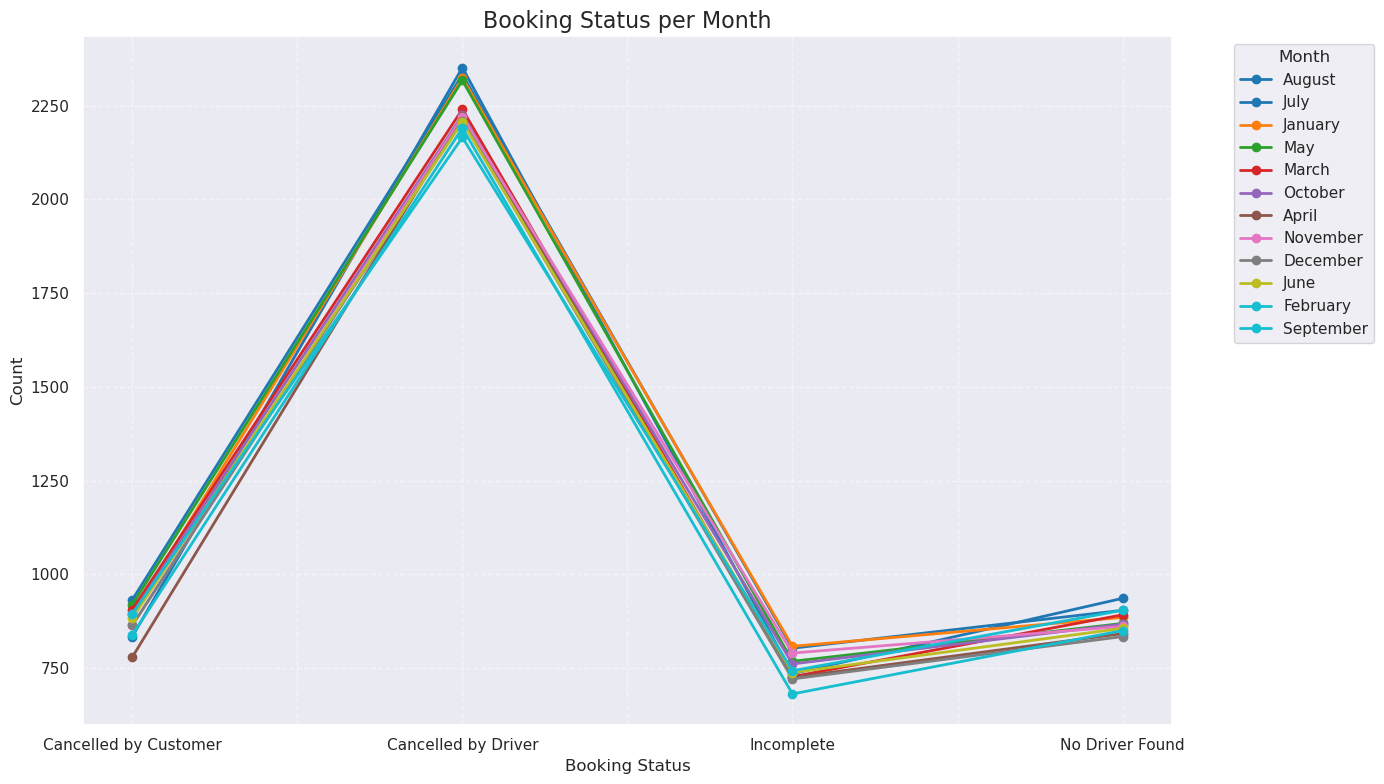

In [167]:
order = df_booking_Status_monthly.max().sort_values(ascending=False).index

df_booking_Status_monthly[order].plot(
    kind="line",
    figsize=(14,8),
    marker="o",
    linewidth=2,
    colormap="tab10"
)

plt.title("Booking Status per Month", fontsize=16)
plt.xlabel("Booking Status")

plt.ylabel("Count")

plt.legend(
    title="Month",
    labels=order,   
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("photos/booking_status_by_month.png")
plt.show()


# We will focus on the first two topics for deeper analysis.


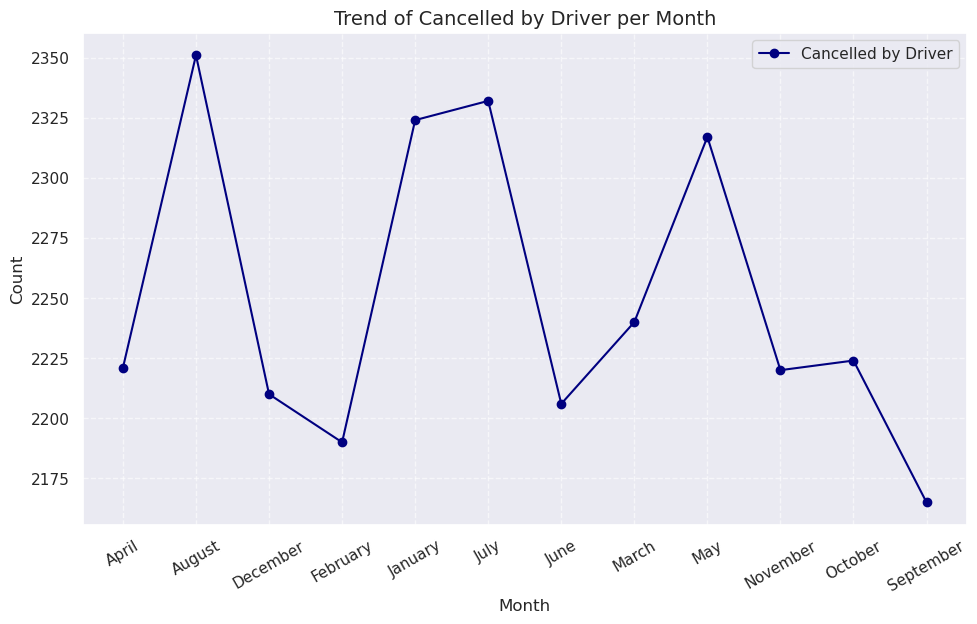

In [168]:

plt.figure(figsize=(10,6))

# نختار أول صف
first_row = df_booking_Status_monthly.iloc[1]

# نرسمه
plt.plot(df_booking_Status_monthly.columns, first_row, marker="o", color="navy", label=df_booking_Status_monthly.index[1])

plt.title(f"Trend of {df_booking_Status_monthly.index[1]} per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(rotation=30)
plt.savefig("photos/"f"Trend of {df_booking_Status_monthly.index[1]} per Month"".png")
plt.show()

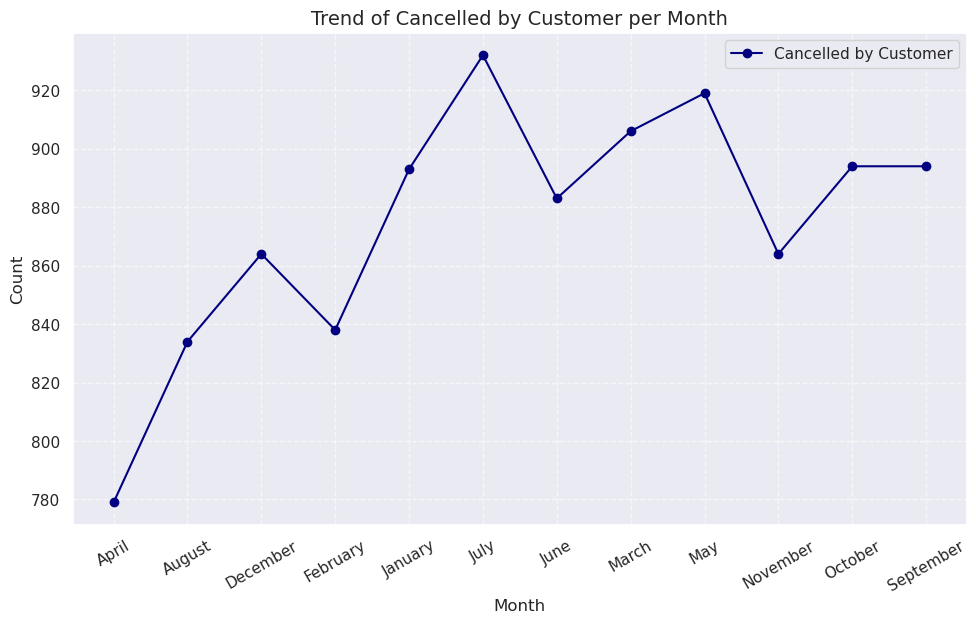

In [169]:

plt.figure(figsize=(10,6))

# نختار أول صف
first_row = df_booking_Status_monthly.iloc[0]

# نرسمه
plt.plot(df_booking_Status_monthly.columns, first_row, marker="o", color="navy", label=df_booking_Status_monthly.index[0])

plt.title(f"Trend of {df_booking_Status_monthly.index[0]} per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(rotation=30)
plt.savefig("photos/"f"Trend of {df_booking_Status_monthly.index[1]} per Month"".png")
plt.show()

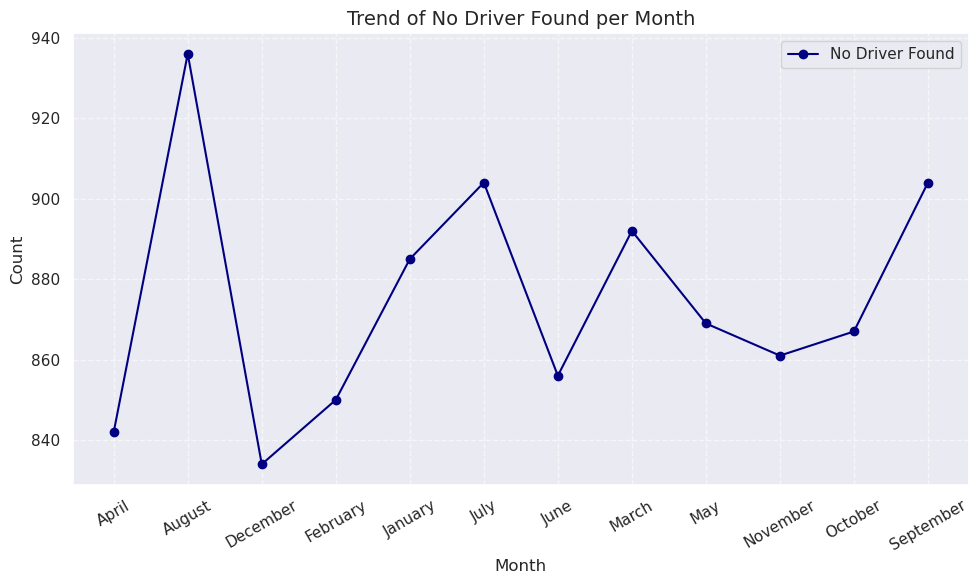

In [170]:

plt.figure(figsize=(10,6))

# نختار أول صف
first_row = df_booking_Status_monthly.iloc[3]

# نرسمه
plt.plot(df_booking_Status_monthly.columns, first_row, marker="o", color="navy", label=df_booking_Status_monthly.index[3])

plt.title(f"Trend of {df_booking_Status_monthly.index[3]} per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=30)

plt.tight_layout()
plt.savefig("photos/"f"Trend of {df_booking_Status_monthly.index[1]} per Month"".png")
plt.show()

# We observed that August recorded the highest number of cancellations by drivers 
## (mainly due to a lack of available cars). 
## Meanwhile, July showed the highest number of cancellations by customers.

# Next, we will focus on analyzing August in more detail to understand the reasons behind this trend.


In [171]:
order_not_complete_in_august = order_not_complete_in_everymonth.loc[order_not_complete_in_everymonth["MonthName"] == "August", ["DayName","Time_Period","Booking Status"]]

order_not_complete_in_august

,DayName,Time_Period,Booking Status
46,Friday,Morning,Cancelled by Customer
64,Tuesday,Evening,Incomplete
79,Thursday,Evening,Cancelled by Driver
136,Thursday,Night,No Driver Found
149,Thursday,Evening,Cancelled by Customer
...,...,...,...
149805,Tuesday,Afternoon,Cancelled by Driver
149808,Monday,Afternoon,Incomplete
149843,Thursday,Morning,No Driver Found
149865,Friday,Evening,Incomplete


In [172]:

order_Cancelled_by_Customer_in_august = order_not_complete_in_august.loc[order_not_complete_in_august["Booking Status"] == "Cancelled by Customer", ["DayName","Time_Period"]]

order_Cancelled_by_Customer_in_august


,DayName,Time_Period
46,Friday,Morning
149,Thursday,Evening
156,Saturday,Evening
285,Friday,Evening
614,Sunday,Morning
...,...,...
148837,Friday,Evening
148871,Friday,Evening
148892,Friday,Evening
149571,Sunday,Evening


In [173]:
day_in_august = pd.DataFrame(order_Cancelled_by_Customer_in_august["DayName"].value_counts())

day_in_august

,count
DayName,
Saturday,147
Thursday,144
Friday,124
Wednesday,120
Tuesday,106
Sunday,103
Monday,90


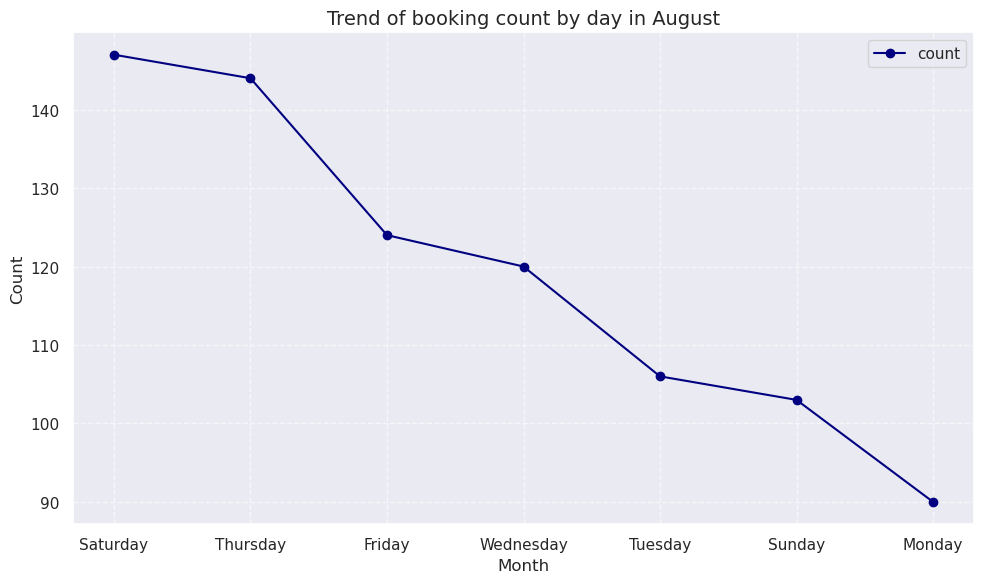

In [174]:


plt.figure(figsize=(10,6))

# نختار أول صف
first_row = day_in_august

# نرسمه
plt.plot(day_in_august.index, first_row, marker="o", color="navy", label=day_in_august.columns)

plt.title(f"Trend of booking count by day in August", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("photos/booking_count_by_day_in_August.png")

plt.show()

In [175]:
order_not_complete_in_day = order_not_complete_in_everymonth.loc[order_not_complete_in_everymonth["MonthName"] == "August", ["Time_Period","Booking Status"]]

order_not_complete_in_day

,Time_Period,Booking Status
46,Morning,Cancelled by Customer
64,Evening,Incomplete
79,Evening,Cancelled by Driver
136,Night,No Driver Found
149,Evening,Cancelled by Customer
...,...,...
149805,Afternoon,Cancelled by Driver
149808,Afternoon,Incomplete
149843,Morning,No Driver Found
149865,Evening,Incomplete


In [176]:
order_not_complete_in_day = order_not_complete_in_day.groupby(["Booking Status", "Time_Period"]).size().unstack()
order_not_complete_in_day


Time_Period,Afternoon,Evening,Morning,Night
Booking Status,,,,
Cancelled by Customer,286,213,248,87
Cancelled by Driver,745,669,707,230
Incomplete,238,212,208,77
No Driver Found,301,274,266,95


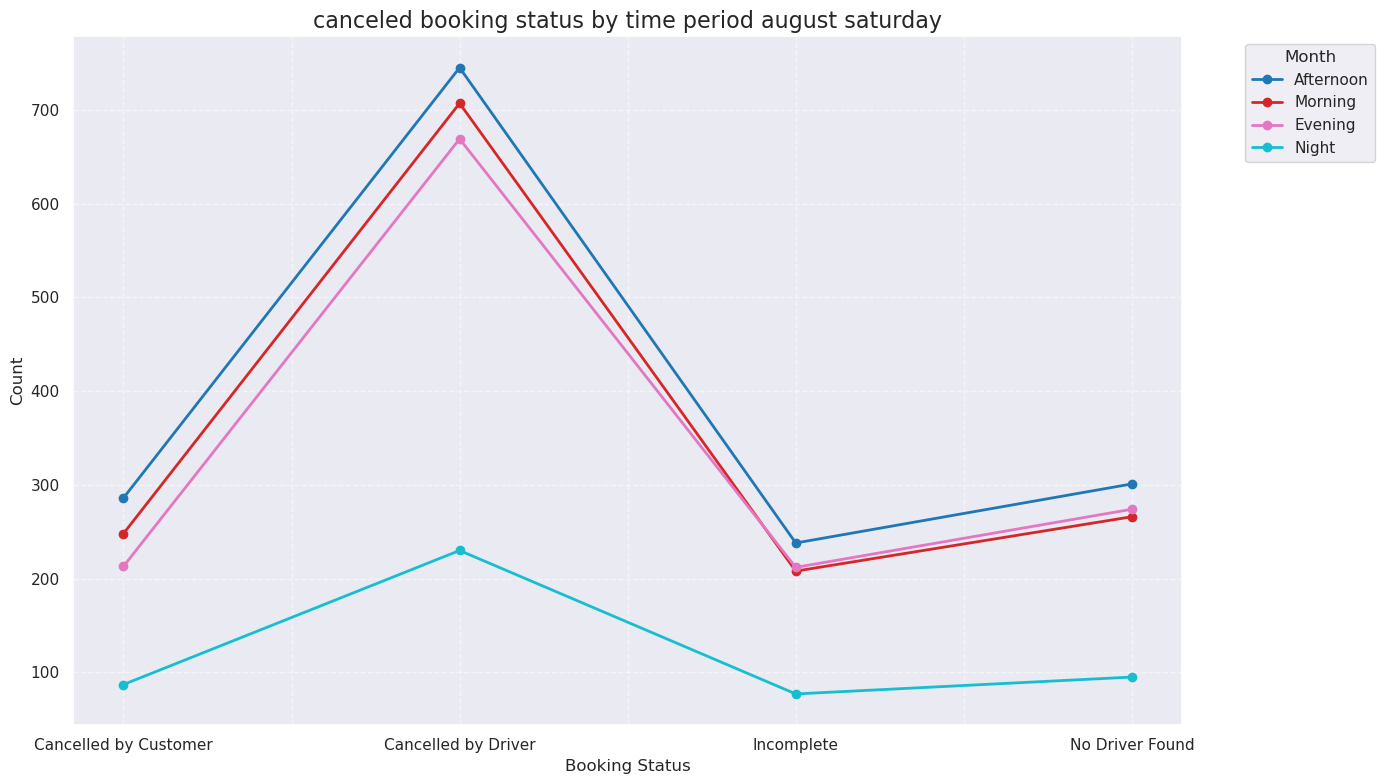

In [177]:
order = order_not_complete_in_day.max().sort_values(ascending=False).index

order_not_complete_in_day[order].plot(
    kind="line",
    figsize=(14,8),
    marker="o",
    linewidth=2,
    colormap="tab10"
)

plt.title("canceled booking status by time period august saturday", fontsize=16)
plt.xlabel("Booking Status")
plt.ylabel("Count")

plt.legend(
    title="Month",
    labels=order,    
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.savefig("photos/canceled_booking_status_by_time_period_august_saturday.png")
plt.show()


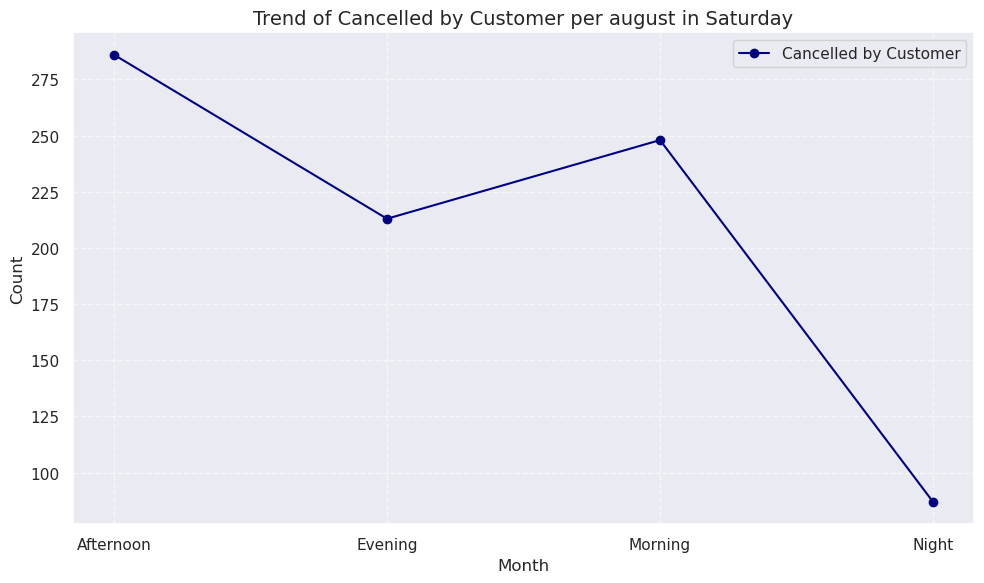

In [178]:

plt.figure(figsize=(10,6))

first_row = order_not_complete_in_day.iloc[0]


plt.plot(order_not_complete_in_day.columns, first_row, marker="o", color="navy", label=order_not_complete_in_day.index[0])

plt.title(f"Trend of {order_not_complete_in_day.index[0]} per august in Saturday", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("photos/Cancelled_by_Customer_booking_status_by_time_period_august_daily.png")
plt.show()

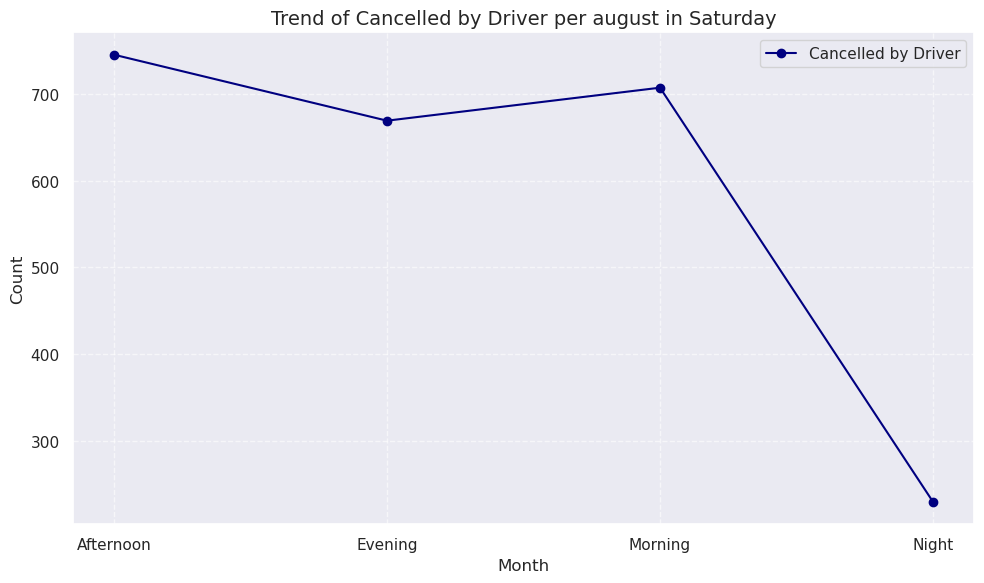

In [179]:

plt.figure(figsize=(10,6))

first_row = order_not_complete_in_day.iloc[1]

plt.plot(order_not_complete_in_day.columns, first_row, marker="o", color="navy", label=order_not_complete_in_day.index[1])

plt.title(f"Trend of {order_not_complete_in_day.index[1]} per august in Saturday", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("photos/Cancelled_by_Driver_booking_status_by_time_period_august_daily.png")
plt.show()

## We notice that during the afternoon and morning, the most orders are cancelled by drivers and customers.

In [180]:
order_not_complete_in_august_in_Saturday = data.loc[
    (data["MonthName"] == "August") &
    (data["DayName"] == "Saturday") &
    (data["Booking Status"].isin(["Cancelled by Driver", "Cancelled by Customer"])) &
    (data["Time_Period"].isin(["Afternoon", "Morning"])),
    ["MonthName","DayName","Time_Period","Booking Status","Avg VTAT", "Avg CTAT", "Pickup Location", "Drop Location"]
]

order_not_complete_in_august_in_Saturday


,MonthName,DayName,Time_Period,Booking Status,Avg VTAT,Avg CTAT,Pickup Location,Drop Location
151,August,Saturday,Afternoon,Cancelled by Driver,7.7,NaN,Bahadurgarh,Pragati Maidan
646,August,Saturday,Morning,Cancelled by Driver,7.9,NaN,Gurgaon Sector 29,Mayur Vihar
1489,August,Saturday,Morning,Cancelled by Driver,9.6,NaN,Ashram,Basai Dhankot
1895,August,Saturday,Morning,Cancelled by Driver,6.2,NaN,Rajiv Chowk,Udyog Bhawan
1993,August,Saturday,Morning,Cancelled by Customer,5.4,NaN,Ardee City,Vishwavidyalaya
...,...,...,...,...,...,...,...,...
144570,August,Saturday,Afternoon,Cancelled by Driver,7.1,NaN,Kanhaiya Nagar,Subhash Chowk
144578,August,Saturday,Afternoon,Cancelled by Customer,12.0,NaN,Cyber Hub,Hauz Rani
145738,August,Saturday,Morning,Cancelled by Driver,11.5,NaN,Jhilmil,Ambience Mall
147547,August,Saturday,Morning,Cancelled by Driver,9.9,NaN,Lajpat Nagar,Jasola


In [181]:
avg_waiting = order_not_complete_in_august_in_Saturday.groupby("Time_Period")[["Avg VTAT", "Avg CTAT"]].mean()

avg_waiting


,Avg VTAT,Avg CTAT
Time_Period,,
Afternoon,9.199359,NaN
Morning,8.437931,NaN


In [182]:
avg_waiting_detailed = order_not_complete_in_august_in_Saturday.groupby(
    ["Time_Period", "Booking Status"]
)[["Avg VTAT", "Avg CTAT"]].mean()

avg_waiting_detailed


Avg VTAT  Avg CTAT
Time_Period Booking Status                            
Afternoon   Cancelled by Customer  12.931915       NaN
            Cancelled by Driver     7.589908       NaN
Morning     Cancelled by Customer  11.687755       NaN
            Cancelled by Driver     7.164000       NaN

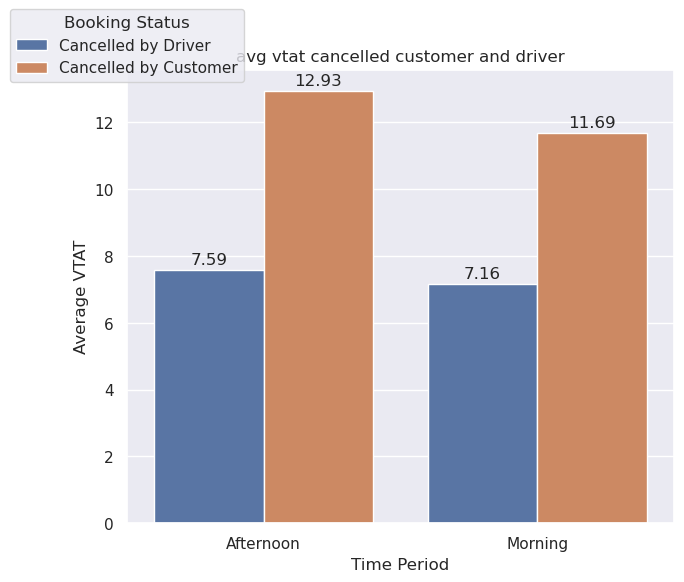

In [183]:
plt.figure(figsize=(7,6))

ax = sns.barplot(
    data=order_not_complete_in_august_in_Saturday,
    x="Time_Period", y="Avg VTAT", hue="Booking Status",
    errorbar=None   
)

plt.title("avg vtat cancelled customer and driver")
plt.xlabel("Time Period")
plt.ylabel("Average VTAT")
plt.legend(title="Booking Status", loc="upper center", bbox_to_anchor=(0, 1.15))

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=2)

plt.tight_layout()
plt.savefig("photos/avg_vtat_cancelled_customer_and_driver.png")
plt.show()


In [184]:
price_and_distance = data.loc[(data["Booking Status"] != "Completed"), ["Booking Status","Booking Value","Ride Distance","Cancelled Rides by Customer", "Reason for cancelling by Customer", "Cancelled Rides by Driver", "Driver Cancellation Reason"]]

price_and_distance

,Booking Status,Booking Value,Ride Distance,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason
0,No Driver Found,0.0,0.00,0,Not Cancelled,0,Not Cancelled
1,Incomplete,237.0,5.73,0,Not Cancelled,0,Not Cancelled
8,No Driver Found,0.0,0.00,0,Not Cancelled,0,Not Cancelled
9,Incomplete,135.0,10.36,0,Not Cancelled,0,Not Cancelled
11,No Driver Found,0.0,0.00,0,Not Cancelled,0,Not Cancelled
...,...,...,...,...,...,...,...
149980,No Driver Found,0.0,0.00,0,Not Cancelled,0,Not Cancelled
149982,No Driver Found,0.0,0.00,0,Not Cancelled,0,Not Cancelled
149984,Incomplete,1146.0,13.96,0,Not Cancelled,0,Not Cancelled
149990,Cancelled by Driver,0.0,0.00,0,Not Cancelled,1,Personal & Car related issues


In [185]:
price_and_distance["Booking Value"].unique()

array([   0.,  237.,  135., ..., 1091., 1295., 1987.], shape=(1445,))

In [186]:
price_and_distance["Booking Status"].unique()

array(['No Driver Found', 'Incomplete', 'Cancelled by Driver',
       'Cancelled by Customer'], dtype=object)

In [187]:
Cancelled_Rides_by_Customer = data.loc[(data["Cancelled Rides by Customer"] == 1), ["Reason for cancelling by Customer"]]

Cancelled_Rides_by_Customer

,Reason for cancelling by Customer
18,Driver is not moving towards pickup location
39,Driver is not moving towards pickup location
46,Driver asked to cancel
62,Driver is not moving towards pickup location
78,Driver asked to cancel
...,...
149943,Wrong Address
149952,Driver asked to cancel
149956,Driver is not moving towards pickup location
149963,Driver is not moving towards pickup location


In [188]:
Cancelled_Rides_by_Customer_values = pd.DataFrame(Cancelled_Rides_by_Customer["Reason for cancelling by Customer"].value_counts())

Cancelled_Rides_by_Customer_values

,count
Reason for cancelling by Customer,
Wrong Address,2362
Change of plans,2353
Driver is not moving towards pickup location,2335
Driver asked to cancel,2295
AC is not working,1155


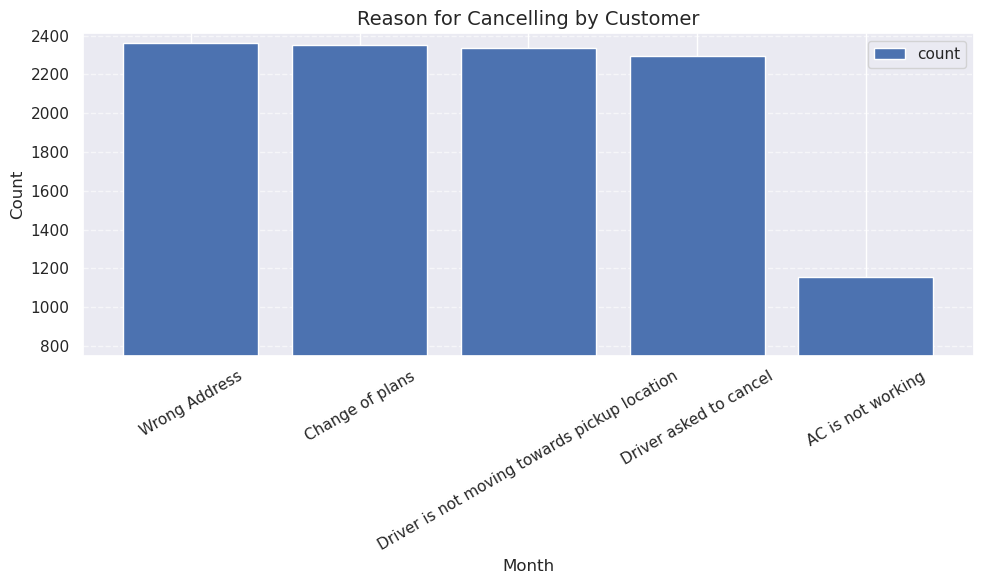

In [189]:
plt.figure(figsize=(10,6))
first_row = Cancelled_Rides_by_Customer_values

plt.bar(
    first_row.index,
    first_row[first_row.columns[0]],   
    label=first_row.columns[0]         
)

plt.title("Reason for Cancelling by Customer", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Count")
plt.ylim(750, first_row[first_row.columns[0]].max() + 50)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("photos/reasons_cancelled_by_customer.png", dpi=300)
plt.show()

In [190]:
Cancelled_Rides_by_Driver = data.loc[(data["Cancelled Rides by Driver"] == 1), ["Driver Cancellation Reason"]]

Cancelled_Rides_by_Driver

,Driver Cancellation Reason
12,Personal & Car related issues
17,Customer related issue
19,Customer related issue
26,Personal & Car related issues
30,More than permitted people in there
...,...
149959,Personal & Car related issues
149973,Customer related issue
149977,Personal & Car related issues
149979,The customer was coughing/sick


In [191]:
Cancelled_Rides_by_Driver_values = pd.DataFrame(Cancelled_Rides_by_Driver["Driver Cancellation Reason"].value_counts())

Cancelled_Rides_by_Driver_values

,count
Driver Cancellation Reason,
Customer related issue,6837
The customer was coughing/sick,6751
Personal & Car related issues,6726
More than permitted people in there,6686


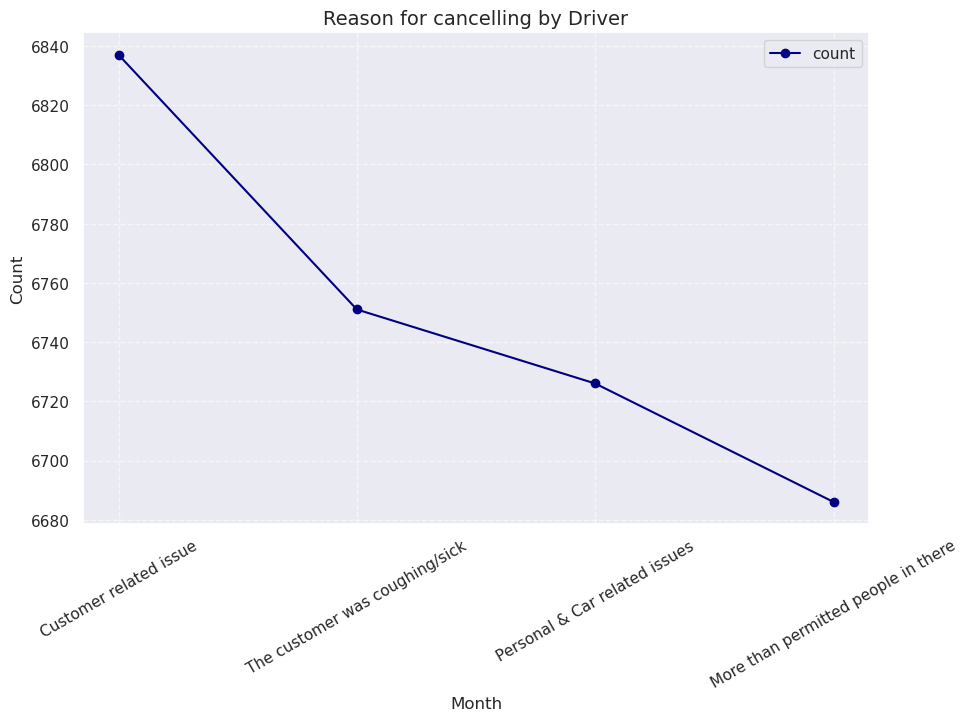

In [192]:
plt.figure(figsize=(10,6))

first_row = Cancelled_Rides_by_Driver_values

plt.plot(Cancelled_Rides_by_Driver_values.index, first_row, marker="o", color="navy", label=Cancelled_Rides_by_Driver_values.columns )

plt.title(f"Reason for cancelling by Driver", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.xticks(rotation=30)

plt.savefig("photos/reasons_cancelled_by_driver.png")
plt.show()

# Reasons for Uncompleted Rides

In [193]:
Incomplete_Rides_Reason = data.loc[(data["Booking Status"] == "Incomplete"), ["Booking Status","Incomplete Rides Reason", "Customer Rating", "Driver Ratings"]]

Incomplete_Rides_Reason

,Booking Status,Incomplete Rides Reason,Customer Rating,Driver Ratings
1,Incomplete,Vehicle Breakdown,0.0,0.0
9,Incomplete,Other Issue,0.0,0.0
28,Incomplete,Vehicle Breakdown,0.0,0.0
42,Incomplete,Other Issue,0.0,0.0
47,Incomplete,Vehicle Breakdown,0.0,0.0
...,...,...,...,...
149870,Incomplete,Other Issue,0.0,0.0
149885,Incomplete,Other Issue,0.0,0.0
149897,Incomplete,Customer Demand,0.0,0.0
149912,Incomplete,Other Issue,0.0,0.0


In [194]:
Incomplete_Rides_Reason_table = Incomplete_Rides_Reason.groupby(["Incomplete Rides Reason","Booking Status"]).size().unstack()

Incomplete_Rides_Reason_table

Booking Status,Incomplete
Incomplete Rides Reason,
Customer Demand,3040
Other Issue,2948
Vehicle Breakdown,3012


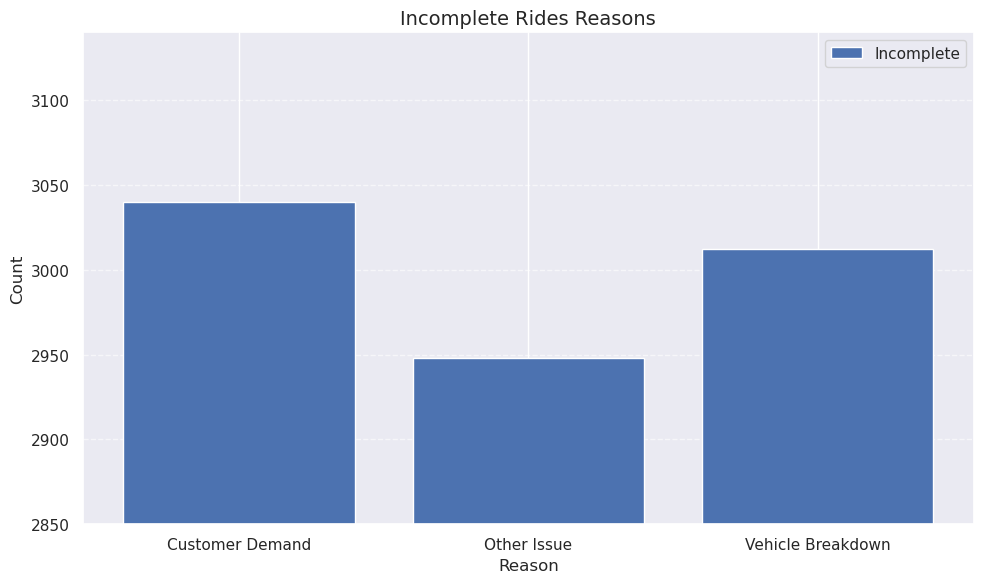

In [195]:
plt.figure(figsize=(10,6))

first_row = Incomplete_Rides_Reason_table

plt.bar(
    Incomplete_Rides_Reason_table.index,
    first_row[first_row.columns[0]],   
    label=Incomplete_Rides_Reason_table.columns[0]
)

plt.title("Incomplete Rides Reasons", fontsize=14)
plt.xlabel("Reason")
plt.ylabel("Count")

plt.ylim(2850, first_row.max().max() + 100)

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("photos/incomplete_rides_reasons.png", dpi=300)
plt.show()

In [196]:
payment_value = data.loc[(data["Booking Status"].isin(["Completed","Incomplete"])), ["Booking Status", "Payment Method", "Booking Value"]]

payment_value

,Booking Status,Payment Method,Booking Value
1,Incomplete,UPI,237.0
2,Completed,Debit Card,627.0
3,Completed,UPI,416.0
4,Completed,UPI,737.0
5,Completed,UPI,316.0
...,...,...,...
149995,Completed,Uber Wallet,475.0
149996,Completed,UPI,1093.0
149997,Completed,Cash,852.0
149998,Completed,UPI,333.0


In [197]:
payment_value_df = pd.DataFrame(payment_value["Payment Method"].value_counts())
payment_value_df

,count
Payment Method,
UPI,45909
Cash,25367
Uber Wallet,12276
Credit Card,10209
Debit Card,8239


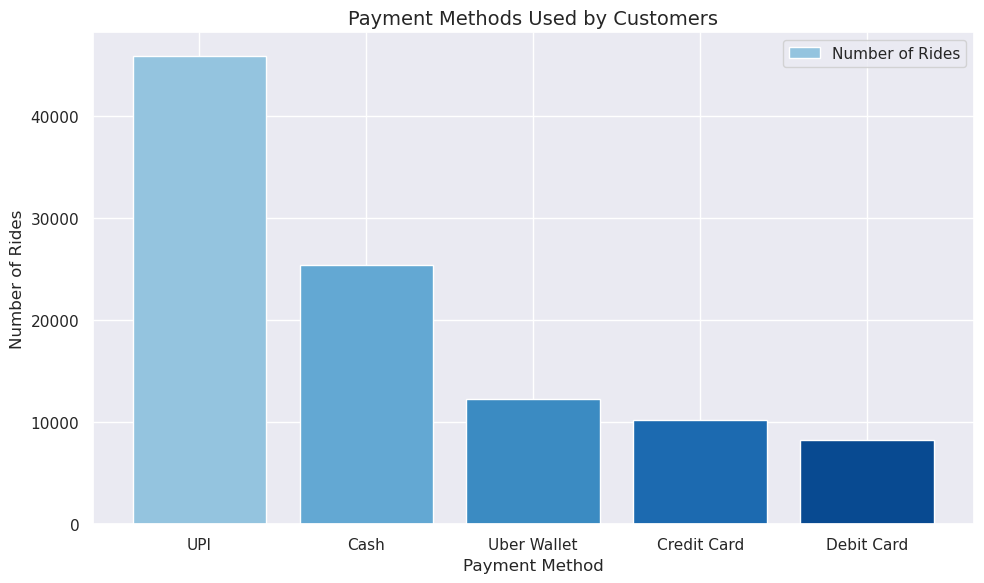

In [198]:
plt.figure(figsize=(10,6))
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(payment_value_df)))
plt.bar(
    payment_value_df.index,
    payment_value_df["count"],
    color=colors,
    label="Number of Rides"
)

plt.title("Payment Methods Used by Customers", fontsize=14)
plt.xlabel("Payment Method")
plt.ylabel("Number of Rides")
plt.legend()
plt.tight_layout()
plt.savefig("photos/payment_methods.png", dpi=300)
plt.show()

In [199]:
avg_payment = payment_value.groupby(
    ["Payment Method"]
)[["Booking Value"]].describe()

avg_payment


Booking Value                                              \
                       count        mean         std   min    25%    50%   
Payment Method                                                             
Cash                 25367.0  508.363188  396.135534  50.0  234.0  417.0   
Credit Card          10209.0  511.707807  400.264137  50.0  242.0  416.0   
Debit Card            8239.0  507.405025  392.648310  50.0  235.0  413.0   
UPI                  45909.0  508.508157  396.303011  50.0  233.0  413.0   
Uber Wallet          12276.0  505.123656  391.662287  50.0  230.0  413.0   

                               
                  75%     max  
Payment Method                 
Cash            686.0  4133.0  
Credit Card     683.0  3985.0  
Debit Card      685.0  4228.0  
UPI             692.0  4277.0  
Uber Wallet     685.0  4202.0

In [200]:
Vehicle_Type_completed_order = data.loc[(data["Booking Status"] == "Completed"), ["Vehicle Type"]]

Vehicle_Type_completed_order

,Vehicle Type
2,Auto
3,Premier Sedan
4,Bike
5,Auto
6,Go Mini
...,...
149995,Go Mini
149996,Go Mini
149997,Go Sedan
149998,Auto


In [201]:
Vehicle_Type_completed_order_values = pd.DataFrame(Vehicle_Type_completed_order.value_counts())
Vehicle_Type_completed_order_values = pd.DataFrame(Vehicle_Type_completed_order_values)
Vehicle_Type_completed_order_values

,count
Vehicle Type,
Auto,23155
Go Mini,18549
Go Sedan,16676
Bike,14034
Premier Sedan,11252
eBike,6551
Uber XL,2783


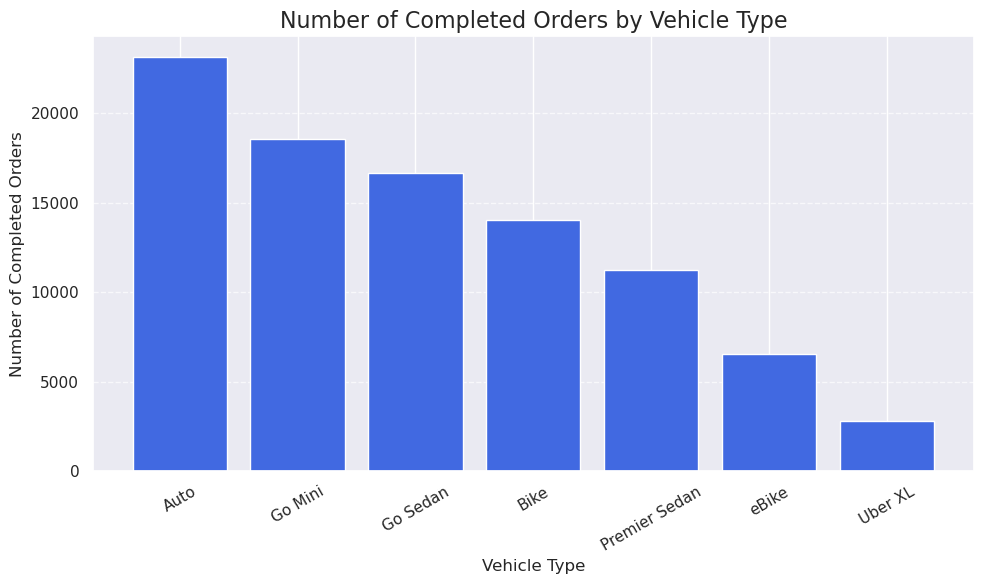

In [202]:
plt.figure(figsize=(10,6))
x_labels = [str(i[0]) if isinstance(i, tuple) else str(i) for i in Vehicle_Type_completed_order_values.index]

plt.bar(
    x_labels,
    Vehicle_Type_completed_order_values["count"].values,
    color="royalblue"
)
plt.title("Number of Completed Orders by Vehicle Type", fontsize=16)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Number of Completed Orders", fontsize=12)

plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("photos/Number_of_Completed_Orders_by_Vehicle_Type.png")
plt.show()

In [203]:
Vehicle_Type_completed_order = data.loc[
    data["Booking Status"] == "Completed", 
    ["Vehicle Type", "Time_Period"]
]

completed_grouped = Vehicle_Type_completed_order.groupby(["Vehicle Type", "Time_Period"]).size().reset_index(name="Count")

print(completed_grouped.sort_values("Count", ascending=False))


     Vehicle Type Time_Period  Count
0            Auto   Afternoon   7540
2            Auto     Morning   6968
1            Auto     Evening   6384
8         Go Mini   Afternoon   5974
10        Go Mini     Morning   5689
12       Go Sedan   Afternoon   5220
14       Go Sedan     Morning   5120
9         Go Mini     Evening   5063
13       Go Sedan     Evening   4654
4            Bike   Afternoon   4554
6            Bike     Morning   4239
5            Bike     Evening   3788
16  Premier Sedan   Afternoon   3659
18  Premier Sedan     Morning   3444
17  Premier Sedan     Evening   3038
3            Auto       Night   2263
24          eBike   Afternoon   2084
26          eBike     Morning   1960
11        Go Mini       Night   1823
25          eBike     Evening   1817
15       Go Sedan       Night   1682
7            Bike       Night   1453
19  Premier Sedan       Night   1111
20        Uber XL   Afternoon    880
22        Uber XL     Morning    838
21        Uber XL     Evening    785
2

In [204]:
top_times = completed_grouped.loc[
    completed_grouped.groupby("Vehicle Type")["Count"].idxmax()
]

print(top_times)


     Vehicle Type Time_Period  Count
0            Auto   Afternoon   7540
4            Bike   Afternoon   4554
8         Go Mini   Afternoon   5974
12       Go Sedan   Afternoon   5220
16  Premier Sedan   Afternoon   3659
20        Uber XL   Afternoon    880
24          eBike   Afternoon   2084


<Figure size 1200x600 with 0 Axes>

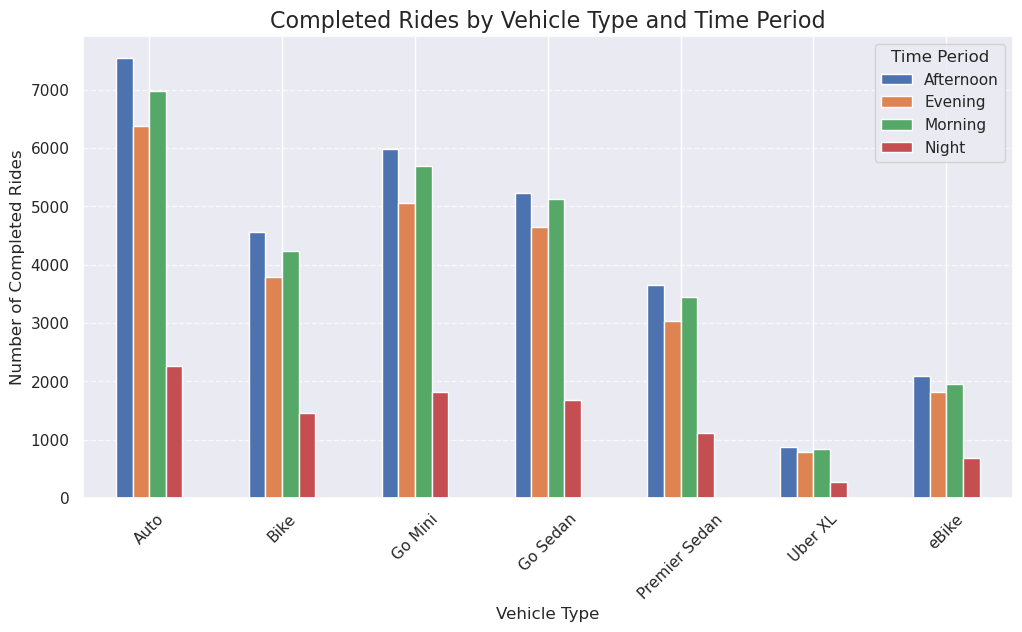

In [205]:

Vehicle_Type_completed_order = data.loc[data["Booking Status"] == "Completed", ["Vehicle Type", "Time_Period"]]

completed_counts = Vehicle_Type_completed_order.groupby(["Vehicle Type", "Time_Period"]).size().unstack()

plt.figure(figsize=(12,6))
completed_counts.plot(kind="bar", figsize=(12,6))

plt.title("Completed Rides by Vehicle Type and Time Period", fontsize=16)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Number of Completed Rides", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Time Period")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("photos/Completed_Rides_by_Vehicle_Type_and_Time_Period.png")
plt.show()

In [206]:
Vehicle_Type_not_completed_order = data.iloc[:,[0,1,13]]

Vehicle_Type_not_completed_order


,Booking Status,Vehicle Type,Ride Distance
0,No Driver Found,eBike,0.00
1,Incomplete,Go Sedan,5.73
2,Completed,Auto,13.58
3,Completed,Premier Sedan,34.02
4,Completed,Bike,48.21
...,...,...,...
149995,Completed,Go Mini,40.08
149996,Completed,Go Mini,21.31
149997,Completed,Go Sedan,15.93
149998,Completed,Auto,45.54


In [207]:
# حساب المتوسط لكل وقت
Vehicle_Type_table = Vehicle_Type_not_completed_order.groupby(["Booking Status", "Vehicle Type"]).size().unstack()

Vehicle_Type_table


Vehicle Type,Auto,Bike,Go Mini,Go Sedan,Premier Sedan,Uber XL,eBike
Booking Status,,,,,,,
Cancelled by Customer,2680,1575,2097,1832,1266,327,723
Cancelled by Driver,6643,4077,5330,5031,3250,762,1907
Completed,23155,14034,18549,16676,11252,2783,6551
Incomplete,2260,1328,1815,1642,1063,262,630
No Driver Found,2681,1503,2015,1960,1280,315,746


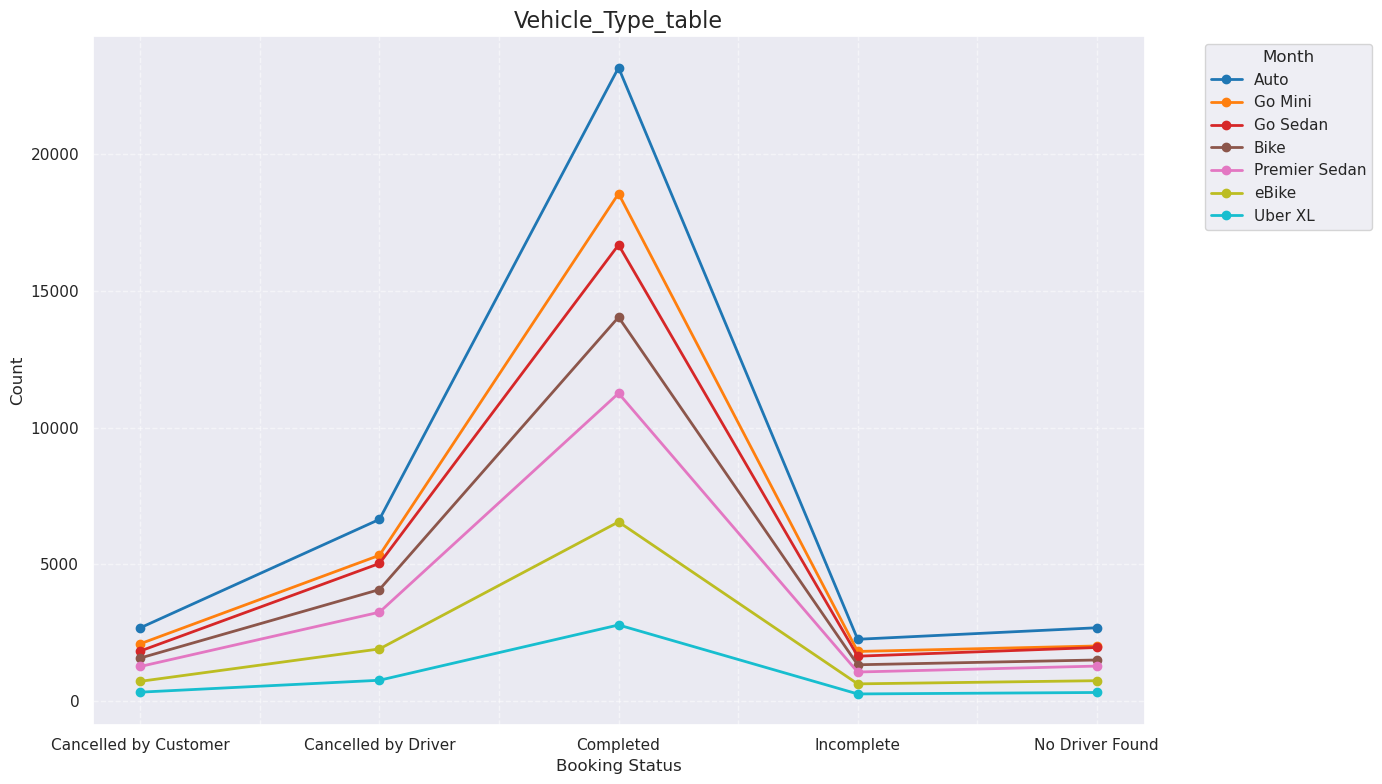

In [208]:
order = Vehicle_Type_table.max().sort_values(ascending=False).index

Vehicle_Type_table[order].plot(
    kind="line",
    figsize=(14,8),
    marker="o",
    linewidth=2,
    colormap="tab10"
)

plt.title("Vehicle_Type_table", fontsize=16)
plt.xlabel("Booking Status")
plt.ylabel("Count")

plt.legend(
    title="Month",
    labels=order,   
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


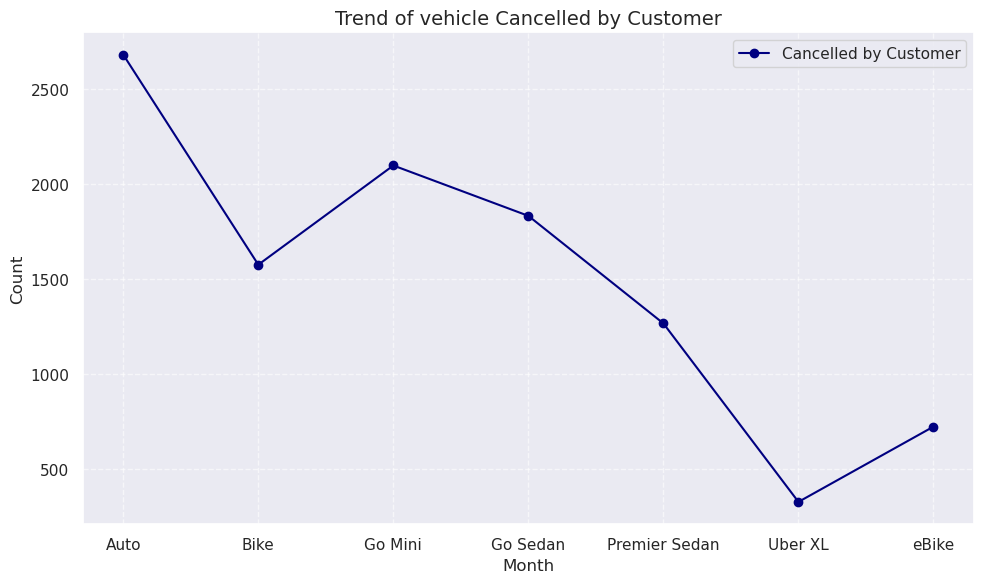

In [209]:

plt.figure(figsize=(10,6))

# نختار أول صف
first_row = Vehicle_Type_table.iloc[0]

# نرسمه
plt.plot(Vehicle_Type_table.columns, first_row, marker="o", color="navy", label=Vehicle_Type_table.index[0])

plt.title(f"Trend of vehicle {Vehicle_Type_table.index[0]}", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Count")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [210]:
avg_vehicle_Ride_Distance = Vehicle_Type_not_completed_order.groupby(
    ["Booking Status"]
)[["Ride Distance"]].describe()

avg_vehicle_Ride_Distance


Ride Distance                                           \
                              count       mean        std  min    25%    50%   
Booking Status                                                                 
Cancelled by Customer       10500.0   0.000000   0.000000  0.0   0.00   0.00   
Cancelled by Driver         27000.0   0.000000   0.000000  0.0   0.00   0.00   
Completed                   93000.0  26.000493  13.824176  2.0  14.10  26.02   
Incomplete                   9000.0  10.547706   5.432730  1.0   5.97  10.54   
No Driver Found             10500.0   0.000000   0.000000  0.0   0.00   0.00   

                                      
                           75%   max  
Booking Status                        
Cancelled by Customer   0.0000   0.0  
Cancelled by Driver     0.0000   0.0  
Completed              37.9425  50.0  
Incomplete             15.1700  20.0  
No Driver Found         0.0000   0.0

In [211]:
rate_value = data.loc[(data["Booking Status"].isin(["Completed","Incomplete"])), ["Booking Status","Driver Ratings", "Customer Rating"]]

rate_value

,Booking Status,Driver Ratings,Customer Rating
1,Incomplete,0.0,0.0
2,Completed,4.9,4.9
3,Completed,4.6,5.0
4,Completed,4.1,4.3
5,Completed,4.1,4.6
...,...,...,...
149995,Completed,3.7,4.1
149996,Completed,4.8,5.0
149997,Completed,3.9,4.4
149998,Completed,4.1,3.7


In [212]:

rate_value_Incomplete = data.loc[(data["Booking Status"] == "Completed"), ["Booking Status","Driver Ratings", "Customer Rating", "Avg VTAT","Avg CTAT", "Booking Value"]]

rate_value_Incomplete

,Booking Status,Driver Ratings,Customer Rating,Avg VTAT,Avg CTAT,Booking Value
2,Completed,4.9,4.9,13.4,25.8,627.0
3,Completed,4.6,5.0,13.1,28.5,416.0
4,Completed,4.1,4.3,5.3,19.6,737.0
5,Completed,4.1,4.6,5.1,18.1,316.0
6,Completed,4.0,4.1,7.1,20.4,640.0
...,...,...,...,...,...,...
149995,Completed,3.7,4.1,10.2,44.4,475.0
149996,Completed,4.8,5.0,5.1,30.8,1093.0
149997,Completed,3.9,4.4,2.7,23.4,852.0
149998,Completed,4.1,3.7,6.9,39.6,333.0


In [213]:
rate_value_Incomplete["Customer Rating"].value_counts()

Customer Rating
4.9    11642
4.6    11533
4.3    10995
4.2    10697
4.5     5890
4.8     5880
5.0     5837
4.7     5763
4.1     5396
4.4     5279
3.9     2370
3.8     2357
3.7     2354
3.6     1194
4.0     1185
3.1     1008
3.4      928
3.3      900
3.2      881
3.0      468
3.5      443
Name: count, dtype: int64

In [214]:
rate_value_Incomplete["Driver Ratings"].value_counts()

Driver Ratings
4.3    14081
4.2    13841
4.6     9368
4.4     7018
4.1     6966
4.9     4705
4.7     4678
4.5     4634
3.9     3915
3.8     3848
3.7     3790
5.0     2365
4.8     2328
3.6     2026
4.0     1995
3.2     1538
3.4     1491
3.3     1461
3.1     1459
3.5      748
3.0      745
Name: count, dtype: int64

In [215]:
munimum_value_complete_by_customer = data.loc[(data["Customer Rating"] == 3.0), ["Booking Status","Driver Ratings", "Customer Rating","Ride Distance", "Avg VTAT","Avg CTAT", "Booking Value"]]
munimum_value_complete_by_customer

,Booking Status,Driver Ratings,Customer Rating,Ride Distance,Avg VTAT,Avg CTAT,Booking Value
322,Completed,4.6,3.0,45.17,11.5,25.4,236.0
485,Completed,4.2,3.0,14.30,5.2,32.1,118.0
493,Completed,4.7,3.0,20.88,8.1,24.1,339.0
795,Completed,4.6,3.0,13.87,5.8,28.3,163.0
1944,Completed,3.1,3.0,32.70,13.7,35.1,427.0
...,...,...,...,...,...,...,...
149101,Completed,4.6,3.0,10.12,12.4,29.1,372.0
149334,Completed,3.4,3.0,31.74,7.9,34.7,136.0
149579,Completed,4.7,3.0,43.46,7.2,40.1,252.0
149899,Completed,4.3,3.0,36.19,14.5,32.0,1115.0


In [216]:
data["Time_Period"].value_counts()

Time_Period
Afternoon    48386
Morning      45458
Evening      41177
Night        14979
Name: count, dtype: int64

In [217]:
data

,Booking Status,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,DayName,MonthName,Time_Period
0,No Driver Found,eBike,Palam Vihar,Jhilmil,NaN,NaN,0,Not Cancelled,0,Not Cancelled,0,Completed,0.0,0.00,0.0,0.0,NaN,Saturday,March,Afternoon
1,Incomplete,Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,Not Cancelled,0,Not Cancelled,1,Vehicle Breakdown,237.0,5.73,0.0,0.0,UPI,Friday,November,Evening
2,Completed,Auto,Khandsa,Malviya Nagar,13.4,25.8,0,Not Cancelled,0,Not Cancelled,0,Completed,627.0,13.58,4.9,4.9,Debit Card,Friday,August,Morning
3,Completed,Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0,Not Cancelled,0,Not Cancelled,0,Completed,416.0,34.02,4.6,5.0,UPI,Monday,October,Afternoon
4,Completed,Bike,Ghitorni Village,Khan Market,5.3,19.6,0,Not Cancelled,0,Not Cancelled,0,Completed,737.0,48.21,4.1,4.3,UPI,Monday,September,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,Completed,Go Mini,MG Road,Ghitorni,10.2,44.4,0,Not Cancelled,0,Not Cancelled,0,Completed,475.0,40.08,3.7,4.1,Uber Wallet,Monday,November,Evening
149996,Completed,Go Mini,Golf Course Road,Akshardham,5.1,30.8,0,Not Cancelled,0,Not Cancelled,0,Completed,1093.0,21.31,4.8,5.0,UPI,Sunday,November,Afternoon
149997,Completed,Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,0,Not Cancelled,0,Not Cancelled,0,Completed,852.0,15.93,3.9,4.4,Cash,Wednesday,September,Morning
149998,Completed,Auto,Ghaziabad,Saidulajab,6.9,39.6,0,Not Cancelled,0,Not Cancelled,0,Completed,333.0,45.54,4.1,3.7,UPI,Saturday,October,Morning


In [218]:
data_corr = data[["Customer Rating", "Avg VTAT", "Avg CTAT", "Booking Value", "Ride Distance"]].corr()
print(data_corr["Customer Rating"])


Customer Rating    1.000000
Avg VTAT           0.019965
Avg CTAT           0.303382
Booking Value      0.508034
Ride Distance      0.716289
Name: Customer Rating, dtype: float64


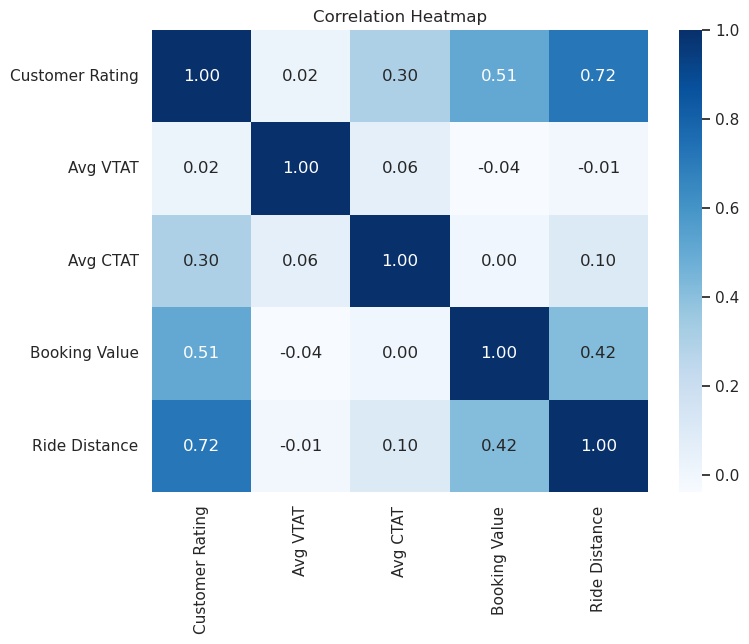

In [219]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data_corr, annot=True, cmap="Blues", fmt=".2f", cbar=True
)
plt.title("Correlation Heatmap")
plt.show()
